# **About The Dataset**

Dataset ini mengenai Indeks Standar Pencemar Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta sejak tahun 2018 - 2019.
Variabel dari data tersebut, antara lain : tanggal, stasiun, pm10, so2, co, o3,
no2, max, critical, categori, pm25


## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

## **Import Dataset**

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Final Project GreatEdu/Kualitas Udara Jakarta 2018 - 2021.csv')
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
0,2018-01-01,DKI1 (Bunderan HI),35.0,20.0,22.0,27.0,2.0,35.0,PM10,BAIK,NaN
1,2018-01-01,DKI2 (Kelapa Gading),59.0,29.0,36.0,33.0,9.0,59.0,PM10,SEDANG,NaN
2,2018-01-01,DKI3 (Jagakarsa),14.0,17.0,22.0,35.0,5.0,35.0,O3,BAIK,NaN
3,2018-01-01,DKI4 (Lubang Buaya),76.0,31.0,31.0,33.0,6.0,76.0,PM10,SEDANG,NaN
4,2018-01-01,DKI5 (Kebon Jeruk),45.0,19.0,38.0,20.0,4.0,45.0,PM10,BAIK,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7300,2021-12-31,DKI1 (Bunderan HI),62.0,52.0,23.0,20.0,14.0,85.0,PM25,SEDANG,85.0
7301,2021-12-31,DKI2 (Kelapa Gading),61.0,33.0,23.0,37.0,44.0,85.0,PM25,SEDANG,85.0
7302,2021-12-31,DKI3 (Jagakarsa),64.0,21.0,44.0,17.0,NaN,64.0,PM10,SEDANG,52.0
7303,2021-12-31,DKI4 (Lubang Buaya),58.0,36.0,21.0,NaN,22.0,90.0,PM25,SEDANG,90.0


# **Data Cleaning**

Diketahui bahwa dataset diatas berisi 7305 baris dan 11 kolom, dari baris dan kolom tersebut masih terdapat beberapa yang null dan tidak ada data, untuk mengatasi masalah ini maka dilakukan pembersihan data agar data nya siap untuk di analisis.

### **1. Menampilkan Informasi Dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   7305 non-null   object 
 1   stasiun   7305 non-null   object 
 2   pm10      7054 non-null   float64
 3   so2       7013 non-null   float64
 4   co        7084 non-null   float64
 5   o3        7043 non-null   float64
 6   no2       7032 non-null   float64
 7   max       7276 non-null   float64
 8   critical  7203 non-null   object 
 9   categori  7305 non-null   object 
 10  pm25      1725 non-null   float64
dtypes: float64(7), object(4)
memory usage: 627.9+ KB


Dari infomasi diatas terlihat bahwa dataset ini memiliki jumlah total entri, jumlah non-null, dan tipe data dari setiap kolom dalam dataset.

### **2. Mengubah Tipe Data**

Pada tahap ini, dilakukan pengubahan tipe data pada dua kolom dalam dataset, yaitu 'tanggal' dan 'categori'. Kolom 'tanggal' yang sebelumnya memiliki tipe data 'object' diubah menjadi 'datetime', hal ini bertujuan untuk mempermudah manipulasi data terkait waktu dan tanggal.

Selain itu, kolom 'categori' yang sebelumnya memiliki tipe data 'object' diubah menjadi 'category'.

In [ ]:
#ubah tipe data tanggal dari object ke datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

#ubah tipe data categori dari object ke category
df['categori'] = df['categori'].astype('category')

In [ ]:
df.dtypes

tanggal     datetime64[ns]
stasiun             object
pm10               float64
so2                float64
co                 float64
o3                 float64
no2                float64
max                float64
critical            object
categori          category
pm25               float64
dtype: object

### **3. Melihat Nilai Null di Dataset**

In [ ]:
df.isnull().sum()

tanggal        0
stasiun        0
pm10         251
so2          292
co           221
o3           262
no2          273
max           29
critical     102
categori       0
pm25        5580
dtype: int64

Dapat dilihat bahwa beberapa kolom seperti 'pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical', dan 'pm25' memiliki nilaii null. Untuk mengatasi hal ini, perlu dilakukan penanganan nilai null seperti menghapus baris atau mengisi nilai null dengan nilai rata-rata.

### **4. Menghapus Kolom yang Tidak Perlu**

**A. Hapus kolom pm25**

Kolom 'pm25' dihapus karena data yang terdapat dalam kolom ini hanya berisi pada tahun 2021 saja.

In [ ]:
df.drop('pm25', axis=1, inplace=True)

In [ ]:
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2018-01-01,DKI1 (Bunderan HI),35.0,20.0,22.0,27.0,2.0,35.0,PM10,BAIK
1,2018-01-01,DKI2 (Kelapa Gading),59.0,29.0,36.0,33.0,9.0,59.0,PM10,SEDANG
2,2018-01-01,DKI3 (Jagakarsa),14.0,17.0,22.0,35.0,5.0,35.0,O3,BAIK
3,2018-01-01,DKI4 (Lubang Buaya),76.0,31.0,31.0,33.0,6.0,76.0,PM10,SEDANG
4,2018-01-01,DKI5 (Kebon Jeruk),45.0,19.0,38.0,20.0,4.0,45.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
7300,2021-12-31,DKI1 (Bunderan HI),62.0,52.0,23.0,20.0,14.0,85.0,PM25,SEDANG
7301,2021-12-31,DKI2 (Kelapa Gading),61.0,33.0,23.0,37.0,44.0,85.0,PM25,SEDANG
7302,2021-12-31,DKI3 (Jagakarsa),64.0,21.0,44.0,17.0,NaN,64.0,PM10,SEDANG
7303,2021-12-31,DKI4 (Lubang Buaya),58.0,36.0,21.0,NaN,22.0,90.0,PM25,SEDANG


**B. Hapus kolom Kategori yang 'Tidak Ada Data"**

In [ ]:
#df = df[df['categori'] != 'TIDAK ADA DATA']

In [ ]:
#ngecek setiap kolom yang null dan drop 'TIDAK ADA DATA'
kolom_nodata = ['o3', 'pm10', 'so2','co','no2', 'max','critical']
df = df.dropna(subset=kolom_nodata, how='all', inplace=False)
df = df[df['categori'] != 'TIDAK ADA DATA']

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2018-01-01,DKI1 (Bunderan HI),35.0,20.0,22.0,27.0,2.0,35.0,PM10,BAIK
1,2018-01-01,DKI2 (Kelapa Gading),59.0,29.0,36.0,33.0,9.0,59.0,PM10,SEDANG
2,2018-01-01,DKI3 (Jagakarsa),14.0,17.0,22.0,35.0,5.0,35.0,O3,BAIK
3,2018-01-01,DKI4 (Lubang Buaya),76.0,31.0,31.0,33.0,6.0,76.0,PM10,SEDANG
4,2018-01-01,DKI5 (Kebon Jeruk),45.0,19.0,38.0,20.0,4.0,45.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
7198,2021-12-31,DKI1 (Bunderan HI),62.0,52.0,23.0,20.0,14.0,85.0,PM25,SEDANG
7199,2021-12-31,DKI2 (Kelapa Gading),61.0,33.0,23.0,37.0,44.0,85.0,PM25,SEDANG
7200,2021-12-31,DKI3 (Jagakarsa),64.0,21.0,44.0,17.0,NaN,64.0,PM10,SEDANG
7201,2021-12-31,DKI4 (Lubang Buaya),58.0,36.0,21.0,NaN,22.0,90.0,PM25,SEDANG


**C. Hapus kolom Max dan Critical**

Kolom ini dihapus karena parameter yang diukur oleh kolom tersebut, yaitu nilai 'max' dan 'critical', dapat dihitung sendiri berdasarkan kolom-kolom polutan.

In [ ]:
hapus_kolom = ['max', 'critical']
df = df.drop(columns=hapus_kolom)

In [ ]:
df

,tanggal,stasiun,pm10,so2,co,o3,no2,categori
0,2018-01-01,DKI1 (Bunderan HI),35.0,20.0,22.0,27.0,2.0,BAIK
1,2018-01-01,DKI2 (Kelapa Gading),59.0,29.0,36.0,33.0,9.0,SEDANG
2,2018-01-01,DKI3 (Jagakarsa),14.0,17.0,22.0,35.0,5.0,BAIK
3,2018-01-01,DKI4 (Lubang Buaya),76.0,31.0,31.0,33.0,6.0,SEDANG
4,2018-01-01,DKI5 (Kebon Jeruk),45.0,19.0,38.0,20.0,4.0,BAIK
...,...,...,...,...,...,...,...,...
7198,2021-12-31,DKI1 (Bunderan HI),62.0,52.0,23.0,20.0,14.0,SEDANG
7199,2021-12-31,DKI2 (Kelapa Gading),61.0,33.0,23.0,37.0,44.0,SEDANG
7200,2021-12-31,DKI3 (Jagakarsa),64.0,21.0,44.0,17.0,NaN,SEDANG
7201,2021-12-31,DKI4 (Lubang Buaya),58.0,36.0,21.0,NaN,22.0,SEDANG


### **5. Menambahkan Kolom Baru untuk Tahun, Bulan dan Minggu**

In [ ]:
df['tahun'] = df['tanggal'].dt.year
df['bulan'] = df['tanggal'].dt.month
df['minggu'] = df['tanggal'].dt.isocalendar().week

In [ ]:
df

,tanggal,stasiun,pm10,so2,co,o3,no2,categori,tahun,bulan,minggu
0,2018-01-01,DKI1 (Bunderan HI),35.0,20.0,22.0,27.0,2.0,BAIK,2018,1,1
1,2018-01-01,DKI2 (Kelapa Gading),59.0,29.0,36.0,33.0,9.0,SEDANG,2018,1,1
2,2018-01-01,DKI3 (Jagakarsa),14.0,17.0,22.0,35.0,5.0,BAIK,2018,1,1
3,2018-01-01,DKI4 (Lubang Buaya),76.0,31.0,31.0,33.0,6.0,SEDANG,2018,1,1
4,2018-01-01,DKI5 (Kebon Jeruk),45.0,19.0,38.0,20.0,4.0,BAIK,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7198,2021-12-31,DKI1 (Bunderan HI),62.0,52.0,23.0,20.0,14.0,SEDANG,2021,12,52
7199,2021-12-31,DKI2 (Kelapa Gading),61.0,33.0,23.0,37.0,44.0,SEDANG,2021,12,52
7200,2021-12-31,DKI3 (Jagakarsa),64.0,21.0,44.0,17.0,NaN,SEDANG,2021,12,52
7201,2021-12-31,DKI4 (Lubang Buaya),58.0,36.0,21.0,NaN,22.0,SEDANG,2021,12,52


### **6. Mengisi Nilai Null**

In [ ]:
#command untuk fill kolom polutan null untuk lokasi yang berbeda

# Kolom data polutan yang null
kolom_polutan = ['o3', 'pm10', 'so2', 'co', 'no2']

# Mengelompokkan data dari stasiun, tahun, dan minggu dan menghitung mean untuk tiap stasiun dan mengubah value agar memiliki maksimal 1 desimal
mean_values = df.groupby(['stasiun', 'tahun', 'minggu'])[kolom_polutan].transform('mean').round(0)

# mengisi value null dengan mean
df[kolom_polutan] = df[kolom_polutan].fillna(mean_values)


In [ ]:
df

,tanggal,stasiun,pm10,so2,co,o3,no2,categori,tahun,bulan,minggu
0,2018-01-01,DKI1 (Bunderan HI),35.0,20.0,22.0,27.0,2.0,BAIK,2018,1,1
1,2018-01-01,DKI2 (Kelapa Gading),59.0,29.0,36.0,33.0,9.0,SEDANG,2018,1,1
2,2018-01-01,DKI3 (Jagakarsa),14.0,17.0,22.0,35.0,5.0,BAIK,2018,1,1
3,2018-01-01,DKI4 (Lubang Buaya),76.0,31.0,31.0,33.0,6.0,SEDANG,2018,1,1
4,2018-01-01,DKI5 (Kebon Jeruk),45.0,19.0,38.0,20.0,4.0,BAIK,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7198,2021-12-31,DKI1 (Bunderan HI),62.0,52.0,23.0,20.0,14.0,SEDANG,2021,12,52
7199,2021-12-31,DKI2 (Kelapa Gading),61.0,33.0,23.0,37.0,44.0,SEDANG,2021,12,52
7200,2021-12-31,DKI3 (Jagakarsa),64.0,21.0,44.0,17.0,15.0,SEDANG,2021,12,52
7201,2021-12-31,DKI4 (Lubang Buaya),58.0,36.0,21.0,NaN,22.0,SEDANG,2021,12,52


In [ ]:
df.isnull().sum()

tanggal      0
stasiun      0
pm10        13
so2         83
co           0
o3          19
no2         14
categori     0
tahun        0
bulan        0
minggu       0
dtype: int64

In [ ]:
#command untuk fill kolom polutan null untuk lokasi yang berbeda

# Kolom data polutan yang null
kolom_polutan = ['o3', 'pm10', 'so2', 'co', 'no2']

# Group by 'stasiun', 'Tahun' and calculate the mean for the specified columns
mean_values = df.groupby(['stasiun', 'tahun'])[kolom_polutan].transform('mean').round(0)

# Fill null values dengan mean values
df[kolom_polutan] = df[kolom_polutan].fillna(mean_values)

In [ ]:
df

,tanggal,stasiun,pm10,so2,co,o3,no2,categori,tahun,bulan,minggu
0,2018-01-01,DKI1 (Bunderan HI),35.0,20.0,22.0,27.0,2.0,BAIK,2018,1,1
1,2018-01-01,DKI2 (Kelapa Gading),59.0,29.0,36.0,33.0,9.0,SEDANG,2018,1,1
2,2018-01-01,DKI3 (Jagakarsa),14.0,17.0,22.0,35.0,5.0,BAIK,2018,1,1
3,2018-01-01,DKI4 (Lubang Buaya),76.0,31.0,31.0,33.0,6.0,SEDANG,2018,1,1
4,2018-01-01,DKI5 (Kebon Jeruk),45.0,19.0,38.0,20.0,4.0,BAIK,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7198,2021-12-31,DKI1 (Bunderan HI),62.0,52.0,23.0,20.0,14.0,SEDANG,2021,12,52
7199,2021-12-31,DKI2 (Kelapa Gading),61.0,33.0,23.0,37.0,44.0,SEDANG,2021,12,52
7200,2021-12-31,DKI3 (Jagakarsa),64.0,21.0,44.0,17.0,15.0,SEDANG,2021,12,52
7201,2021-12-31,DKI4 (Lubang Buaya),58.0,36.0,21.0,28.0,22.0,SEDANG,2021,12,52


In [ ]:
df.isnull().sum()

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
tahun       0
bulan       0
minggu      0
dtype: int64

### **7. Menghapus Kolom yang Tidak Perlu**

Sebelum melakukan pemodelan, terlebih dulu kita menghapus kolom tanggal, stasiun, tahun, bulan, dan minggu.

In [ ]:
hapus_kolom = ['tanggal', 'stasiun', 'tahun', 'bulan', 'minggu']
df = df.drop(columns=hapus_kolom)

In [ ]:
df

,pm10,so2,co,o3,no2,categori
0,35.0,20.0,22.0,27.0,2.0,BAIK
1,59.0,29.0,36.0,33.0,9.0,SEDANG
2,14.0,17.0,22.0,35.0,5.0,BAIK
3,76.0,31.0,31.0,33.0,6.0,SEDANG
4,45.0,19.0,38.0,20.0,4.0,BAIK
...,...,...,...,...,...,...
7198,62.0,52.0,23.0,20.0,14.0,SEDANG
7199,61.0,33.0,23.0,37.0,44.0,SEDANG
7200,64.0,21.0,44.0,17.0,15.0,SEDANG
7201,58.0,36.0,21.0,28.0,22.0,SEDANG


# **Pemodelan**

Mengelompokkan kategori berdasarkan data kualitas udara di berbagai stasiun DKI Jakarta dengan menerapkan algoritma K-Nearest Neighbors (KNN) Classifier, Decision Tree Classifier, Random Forest Classifier, dan XBGoost Classifier.

### **Import Libraries for Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



### **Mengubah Kategori Menjadi Numerik**

In [ ]:
# Membuat pemetaan
category_mapping = {'SANGAT TIDAK SEHAT': 0, 'TIDAK SEHAT': 1, 'SEDANG': 2, 'BAIK': 3}

# Melakukan pemetaan pada kolom 'categori'
df['categori'] = df['categori'].map(category_mapping)

# Mengubah tipe data 'categori' menjadi integer
df['categori'] = df['categori'].astype(int)

In [ ]:
df

,pm10,so2,co,o3,no2,categori
0,35.0,20.0,22.0,27.0,2.0,3
1,59.0,29.0,36.0,33.0,9.0,2
2,14.0,17.0,22.0,35.0,5.0,3
3,76.0,31.0,31.0,33.0,6.0,2
4,45.0,19.0,38.0,20.0,4.0,3
...,...,...,...,...,...,...
7198,62.0,52.0,23.0,20.0,14.0,2
7199,61.0,33.0,23.0,37.0,44.0,2
7200,64.0,21.0,44.0,17.0,15.0,2
7201,58.0,36.0,21.0,28.0,22.0,2


In [ ]:
df.dtypes

pm10        float64
so2         float64
co          float64
o3          float64
no2         float64
categori      int64
dtype: object

### **Feature and Target**

In [ ]:
# Bagi kumpulan data menjadi fitur (X) dan target (y)
X = df.d('categori', axis=1)
y = df['categori']

In [ ]:
X

,pm10,so2,co,o3,no2
0,35.0,20.0,22.0,27.0,2.0
1,59.0,29.0,36.0,33.0,9.0
2,14.0,17.0,22.0,35.0,5.0
3,76.0,31.0,31.0,33.0,6.0
4,45.0,19.0,38.0,20.0,4.0
...,...,...,...,...,...
7198,62.0,52.0,23.0,20.0,14.0
7199,61.0,33.0,23.0,37.0,44.0
7200,64.0,21.0,44.0,17.0,15.0
7201,58.0,36.0,21.0,28.0,22.0


In [ ]:
y

0       3
1       2
2       3
3       2
4       3
       ..
7198    2
7199    2
7200    2
7201    2
7202    2
Name: categori, Length: 7203, dtype: int64

### **Train and Test Splitting of Data**

Membagi data menjadi dua yaitu data latih sebanyak 75% dan data uji sebanyak 25%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## **Evaluasi Model**

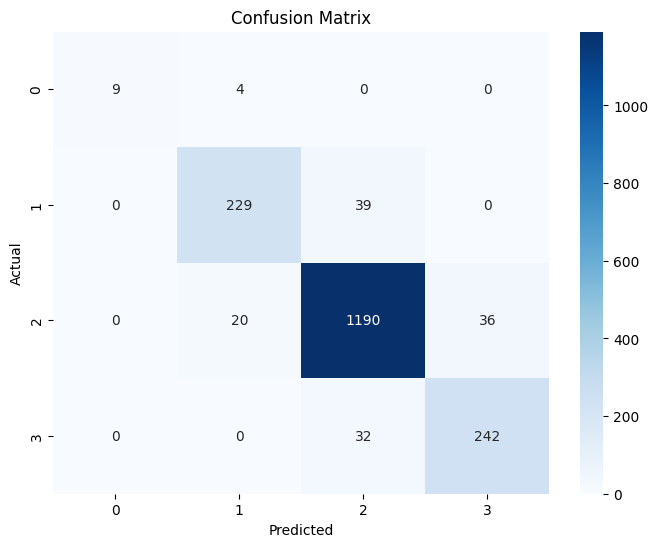

K-Nearest Neighbors Classifier Metrics :
Accuracy : 0.9272626318711826
Precision: 0.9272291107793758
Recall : 0.9272626318711826
F1 Score : 0.9269049232858354
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.91      0.85      0.88       268
           2       0.94      0.96      0.95      1246
           3       0.87      0.88      0.88       274

    accuracy                           0.93      1801
   macro avg       0.93      0.85      0.88      1801
weighted avg       0.93      0.93      0.93      1801



In [ ]:
# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the test set
knn_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, knn_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, knn_pred, average='weighted')
recall = recall_score(y_test, knn_pred, average='weighted')
f1 = f1_score(y_test, knn_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, knn_pred)

# Generate a confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, knn_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics :")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall :", recall)
print("F1 Score :", f1)

# Print the classification report
print("Classification Report :\n", classification_rep)

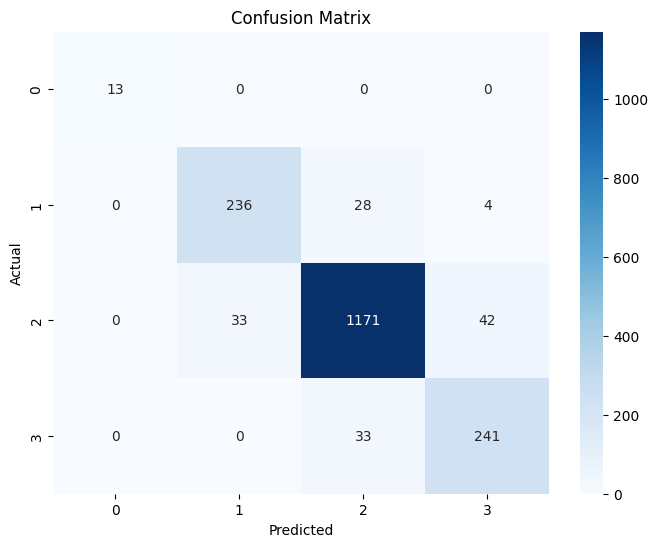

Decision Tree Classifier Metrics:
Accuracy: 0.9222654081066074
Precision: 0.9231055627180031
Recall: 0.9222654081066074
F1 Score: 0.9225939313673406
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.88      0.88       268
           2       0.95      0.94      0.95      1246
           3       0.84      0.88      0.86       274

    accuracy                           0.92      1801
   macro avg       0.92      0.92      0.92      1801
weighted avg       0.92      0.92      0.92      1801



In [ ]:
# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier()

# Train the decision tree model
dt.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, dt_pred, average='weighted')
recall = recall_score(y_test, dt_pred, average='weighted')
f1 = f1_score(y_test, dt_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, dt_pred)

# Generate a confusion matrix
confusion_matrix_dt = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

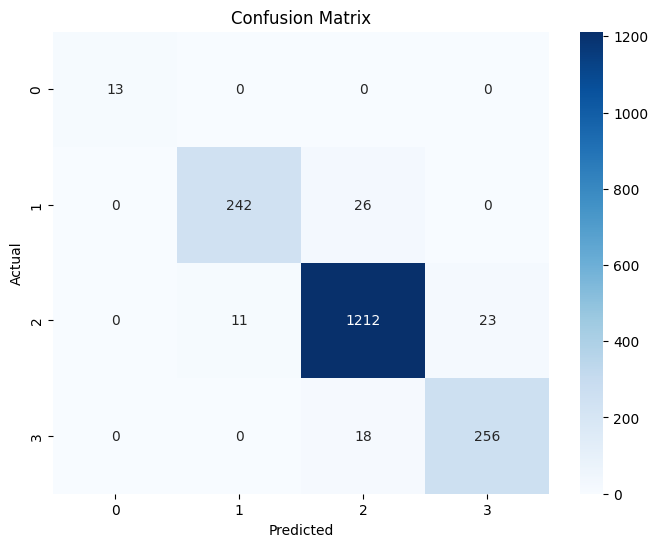

Random Forest Classifier Metrics:
Accuracy: 0.9566907273736813
Precision: 0.9567519883055094
Recall: 0.9566907273736813
F1 Score: 0.9565844521728376
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.96      0.90      0.93       268
           2       0.96      0.97      0.97      1246
           3       0.92      0.93      0.93       274

    accuracy                           0.96      1801
   macro avg       0.96      0.95      0.96      1801
weighted avg       0.96      0.96      0.96      1801



In [ ]:
# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

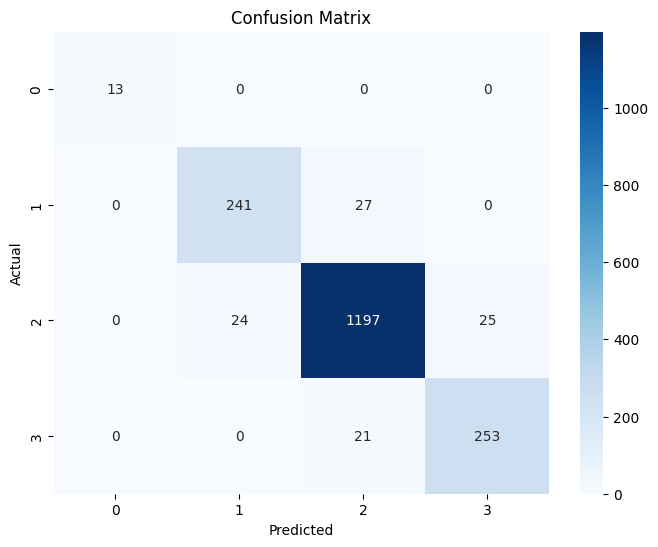

XGBoost Classifier Metrics:
Accuracy: 0.9461410327595781
Precision: 0.9461684952249533
Recall: 0.9461410327595781
F1 Score: 0.9461430701664805
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      0.90      0.90       268
           2       0.96      0.96      0.96      1246
           3       0.91      0.92      0.92       274

    accuracy                           0.95      1801
   macro avg       0.95      0.95      0.95      1801
weighted avg       0.95      0.95      0.95      1801



In [ ]:
# Create an XGBClassifier instance
xgb = XGBClassifier()

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Predict on the test set
xgb_pred = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, xgb_pred, average='weighted')
recall = recall_score(y_test, xgb_pred, average='weighted')
f1 = f1_score(y_test, xgb_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, xgb_pred)

# Generate a confusion matrix
confusion_matrix_xgb = confusion_matrix(y_test, xgb_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Dari hasil keempat model, diperoleh bahwa:

1.   Model K-Nearest Neighbors (KNN) mencapai tingkat akurasi sebesar 93%
2.   Model Decision Tree mencapai tingkat akurasi sebesar 92%
3.   Model Random Forest mencapai tingkat akurasi sebesar 96%
4.   Model XGBoost mencapai tingkat akurasi sebesar 95%

Berdasarkan tingkat akurasi yang diperoleh, model Random Forest menunjukkan performa yang paling baik dengan akurasi sebesar 96%.



